In [655]:
import numpy as np
import matplotlib.pyplot as plt

# Multi armed bandit


the point of the multi armed bandit problem is to create a program that will find the best arm for maximum return on average


In [671]:
"""
defining the arms and their scores
"""
def T1():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 1000
    else:
        score += 10
    return score
def T2():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 200
    else:
        score += 20
    return score
def T3():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 300
    return score
def T4():
    score = 0
    score += 25
    return score

Arm_dict = {1:T1,2:T2,3:T3,4:T4}

"""
getting the baseline score of each arm this will be used to find the best arm to pull at first
"""
def baseline(n_trails, arm_dict):
    #creating the scoring tracker
    times_arm_pulled, arm_scores = {}, {}
    for i in Arm_dict.keys():
        times_arm_pulled[i], arm_scores[i] = 0, 0
    
    while n_trails:
        n_trails -= 1 
        #pulling arms
        for i in arm_dict.keys():

            #setting arm selection 
            arm_pulled = i
            pulling_score = arm_dict[i]()

            #scoring metric
            times_arm_pulled[arm_pulled] += 1
            arm_scores[arm_pulled] += pulling_score

    return arm_scores, times_arm_pulled

In [698]:
def epsilon_greedy(n_trails, explore_rate, choices, baseline_trails=1):
    """
    will try to maximize the score by choosing the best arm to pull while exploring other arms
    _______________________________________________________________________________________________
    
    n_trails: is the number of times this will loop
    
    explore_rate: is the Percentage of time it will choose something other than the best option
    
    choices: a dictionary of the scoring functions
    
    baseline_trails: how many times the arms must be pulled before the choser will start deciding whats best
    """
    #getting the baseline metrics for the chooser
    arm_scores, times_arm_pulled= baseline(baseline_trails, choices)
    score_per_trail = []
    
    #creating a way to track the long term average score
    percentage_over_time = {}
    for i in arm_scores.keys():
        percentage_over_time[i] = []
    
    #creating a way to track what arm is pulled throughout each loop
    arm_pulled_over_time = []
    
    while n_trails:
        n_trails -= 1
        
        #generate the current best arm to pull based on avg score
        percentage = {}
        for i in arm_scores.keys():
            percentage[i] = arm_scores[i]/times_arm_pulled[i]
        
        #exploring
        if np.random.randint(1,101) <= explore_rate:
            #generating a temparary dic so the best scoring arm wont be pulled
            temp_d = percentage.copy()
            del temp_d[max(temp_d, key=lambda k: temp_d[k])]
            
            #setting which arm is pulled
            arm_pulled = np.random.choice(list(temp_d.keys()))
            
            #setting the score that arm gives
            choice_score = choices[arm_pulled]()
            
            #updating the the arm scores and times arm pulled to update the best average arm
            arm_scores[arm_pulled] += choice_score
            times_arm_pulled[arm_pulled] += 1
            
            #tracking the scoring
            score_per_trail.append(choice_score)
            arm_pulled_over_time.append(arm_pulled)
        
        #exploiting the curruntly best scoring arm 
        else:
            #finding the best arm
            arm_pulled = max(percentage, key=lambda k: percentage[k])
            #setting the score for the best arm
            choice_score = choices[arm_pulled]()
            #updating the arm scores and times arm pulled to update the best average arm
            arm_scores[arm_pulled] += choice_score
            times_arm_pulled[arm_pulled] += 1
            #tracking the scoring
            score_per_trail.append(choice_score)
            arm_pulled_over_time.append(arm_pulled)
        
        # updating the average scoring of the arms to track the best arm
        for key, value in percentage.items():
            percentage_over_time[key].append(value)
    
    #finding the grand total score
    grand_score = sum(score_per_trail)
    
    #creating the accumulating score
    score_over_time = []
    for i in score_per_trail:
        if len(score_over_time) == 0:
            score_over_time.append(i)
        else:
            score_over_time.append(i+score_over_time[-1])

    return score_per_trail, score_over_time,  grand_score, percentage_over_time, arm_pulled_over_time

In [680]:
score_per_trail, score_over_time, grand_score, percentage_over_time, arm_pulled_over_time = epsilon_greedy(200, 10, Arm_dict)

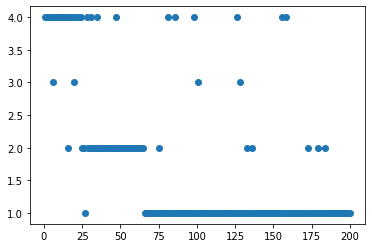

In [699]:
plt.scatter(range(1,len(arm_pulled_over_time)+1),arm_pulled_over_time)

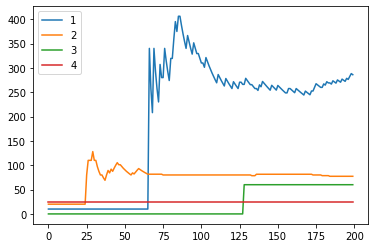

In [700]:
fig, ax = plt.subplots()
for i in percentage_over_time:    
    ax.plot(percentage_over_time[i], label=i)
leg = ax.legend();

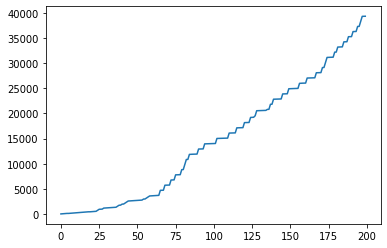

In [701]:
plt.plot(score_over_time)

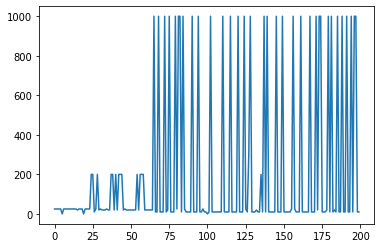

In [702]:
plt.plot(score_per_trail)